In [63]:
import json
import csv
import pandas as pd
import numpy as np
import re

In [64]:
#Universal Variables
imagetags = set()
hashtags = set()
imageobjects = set()
imagecolors = set()
fieldnames = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes']

In [65]:
def Column_Headers(imagetags, hashtags, imageobjects, imagecolors):
    with open('visit_utah_updated_01_19.json', mode = 'r', encoding = 'utf-8') as f:
        data = json.loads(f.read(), encoding = 'utf-8')
    #Get all the column header names from the data
    for photo in data: #Get the column names
        md = photo['metadata'] #The photo's metadata
        tags = md['imageTags'] #The photo's image tags by the API
        ht = md['hashtags'] #The photo's hash tags by the user
        objects = md['imageObjects'] #Objects in the photo found by the API
        colors = md['imageColors'] #The 3 main colors in the photo found by the API
        words = md['keywords'] #Main words in the photo's user caption found by the API
        for tag in tags:
            imagetags.add(tag['value'])
        for tag in ht:
            hashtags.add(tag)
        for obj in objects:
            imageobjects.add(obj['name'])
        for color in colors:
            imagecolors.add(color['value'])
    return data

In [66]:
def Image_Tag_Data(fieldnames, data, imagetags):
    fn = fieldnames.copy()
    length = 8+len(imagetags)
    for tag in imagetags:
        fn.append(tag)
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        tags = md['imageTags'] #The photo's image tags by the API
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        i = 8
        for tag1 in imagetags:
            for tag2 in tags:
                if tag1 == tag2['value']:
                    photodata[i] = 1 #tag2['confidence']
                    break
            i = i+1
#         photodata[length-3] = photo['nFollowers']
#         photodata[length-2] = photo['nComments']
#         photodata[length-1] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    DF1 = DF.iloc[:,0:8]
    DF2 = DF.iloc[:,8:]
    DF2 = DF2.astype(float)
    DF2 = DF2.round(decimals=0)
    DF2 = DF2.astype(int)
    sum1 = DF2.sum(axis=0)
    badCols = list()
    for index in range(len(sum1)):
        if sum1[index]  < 10:
            badCols.append(index)
    DF2 = DF2.drop(DF2.columns[badCols], axis=1)
    DF = pd.concat([DF1, DF2],axis=1)
    return DF

In [67]:
def Hashtag_Data(fieldnames, data, hashtags):
    fn = fieldnames.copy()
    length = 8+len(hashtags)
    for tag in hashtags:
        fn.append(tag)
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        ht = md['hashtags']
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        i = 8
        for tag1 in hashtags:
            for tag2 in ht:
                if tag1 == tag2:
                    photodata[i] = 1
                    break
            i = i+1
#         photodata[length-3] = photo['nFollowers']
#         photodata[length-2] = photo['nComments']
#         photodata[length-1] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    DF1 = DF.iloc[:,0:8]
    DF2 = DF.iloc[:,8:]
    DF2 = DF2.astype(int)
    sum1 = DF2.sum(axis=0)
    badCols = list()
    for index in range(len(sum1)):
        if sum1[index]  < 10:
            badCols.append(index)
    DF2 = DF2.drop(DF2.columns[badCols], axis=1)
    DF = pd.concat([DF1, DF2],axis=1)
    return DF

In [68]:
def Image_Object_Data(fieldnames, data, imageobjects):    
    fn = fieldnames.copy()
    length = 8+len(imageobjects)
    for objects in imageobjects:
        fn.append(objects)
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        objects = md['imageObjects']
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        i = 8
        for object1 in imageobjects:
            for object2 in objects:
                if object1 == object2['name']:
                    photodata[i] = 1 #object2['conf']
                    break
            i = i+1
#         photodata[length-3] = photo['nFollowers']
#         photodata[length-2] = photo['nComments']
#         photodata[length-1] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    str_obj = DF.iloc[:,0:8] #creates dataset of just str data
    int_obj = DF.iloc[:,8:]
    int_obj = int_obj.astype(int) #creates dataset to convert datatypes to int
    sum1 = int_obj.sum(axis=0) #get sums of columns
    badCols = list()
    for index in range(len(sum1)):
       if sum1[index]  < 5: #if object occurs less than 5 times, column name will be added to badCols list
           badCols.append(index)
    int_obj = int_obj.drop(int_obj.columns[badCols], axis=1) #names in badCols list will be dropped from original dataset
    DF= pd.concat([str_obj, int_obj], axis=1) #combines str & int datasets
    return DF

In [69]:
def Image_Color_Data(fieldnames, data, imagecolors):
    fn = fieldnames.copy()
    length = 8+len(imagecolors)
    for color in imagecolors:
        fn.append(color)
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        colors = md['imageColors']
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        i = 8
        for color1 in imagecolors:
            for color2 in colors:
                if color1 == color2['value']:
                    photodata[i] = color2['confidence']
                    break
            i = i+1
#         photodata[length-3] = photo['nFollowers']
#         photodata[length-2] = photo['nComments']
#         photodata[length-1] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    DF.columns = map(str.upper, DF.columns) #Capitalize all column names
#This Color Group csv is a separate file that needs to be read in
    with open('Color Group.csv', mode='r') as infile:
        reader = csv.reader(infile)
        mydict = {rows[0]:rows[1] for rows in reader}
    DF=DF.rename(index=str,columns=mydict)
#create a list of color groups
    color=['Pink','Purple','Red','Orange','Yellow','Green','Cyan','Blue','Brown','White','Grey','Black']
#change value tpe to float
    for c in color:
        DF[c]=DF[c].astype('float')
    DF.head()
    df=DF.transpose().reset_index().rename(columns={'index':'Color'}) #transpose dataset 
    df = df.groupby('Color').sum() #groupby based on color group
    DF=df.T #transpose back
    DF.head()
    cols = ['PageName', 'PostID', 'PostTime','Height','Width','Followers', 'Comments', 'Likes', 'Pink','Purple','Red','Orange','Yellow','Green','Cyan','Blue','Brown','White','Grey','Black']
    DF = DF.reindex(columns=cols)
    return DF

In [70]:
def sylco(word):  #Syllable counter given only the spelling of a word
    word = word.lower()

    # exception_add are words that need extra syllables
    # exception_del are words that need less syllables

    exception_add = ['serious','crucial']
    exception_del = ['fortunately','unfortunately', 'facebook']

    co_one = ['cool','coach','coat','coal','count','coin','coarse','coup','coif','cook','coign','coiffe','coof','court']
    co_two = ['coapt','coed','coinci']

    pre_one = ['preach']

    syls = 0 #added syllable number
    disc = 0 #discarded syllable number

    #1) if letters < 3 : return 1
    if len(word) <= 3 :
        syls = 1
        return syls

    #2) if doesn't end with "ted" or "tes" or "ses" or "ied" or "ies", discard "es" and "ed" at the end.
    # if it has only 1 vowel or 1 set of consecutive vowels, discard. (like "speed", "fled" etc.)

    if word[-2:] == "es" or word[-2:] == "ed" :
        doubleAndtripple_1 = len(re.findall(r'[eaoui][eaoui]',word))
        if doubleAndtripple_1 > 1 or len(re.findall(r'[eaoui][^eaoui]',word)) > 1 :
            if word[-3:] == "ted" or word[-3:] == "tes" or word[-3:] == "ses" or word[-3:] == "ied" or word[-3:] == "ies" :
                pass
            else :
                disc+=1

    #3) discard trailing "e", except where ending is "le"  

    le_except = ['whole','mobile','pole','male','female','hale','pale','tale','sale','aisle','whale','while']

    if word[-1:] == "e" :
        if word[-2:] == "le" and word not in le_except :
            pass

        else :
            disc+=1

    #4) check if consecutive vowels exists, triplets or pairs, count them as one.

    doubleAndtripple = len(re.findall(r'[eaoui][eaoui]',word))
    tripple = len(re.findall(r'[eaoui][eaoui][eaoui]',word))
    disc+=doubleAndtripple + tripple

    #5) count remaining vowels in word.
    numVowels = len(re.findall(r'[eaoui]',word))

    #6) add one if starts with "mc"
    if word[:2] == "mc" :
        syls+=1

    #7) add one if ends with "y" but is not surrouned by vowel
    if word[-1:] == "y" and word[-2] not in "aeoui" :
        syls +=1

    #8) add one if "y" is surrounded by non-vowels and is not in the last word.

    for i,j in enumerate(word) :
        if j == "y" :
            if (i != 0) and (i != len(word)-1) :
                if word[i-1] not in "aeoui" and word[i+1] not in "aeoui" :
                    syls+=1

    #9) if starts with "tri-" or "bi-" and is followed by a vowel, add one.

    if word[:3] == "tri" and word[3] in "aeoui" :
        syls+=1

    if word[:2] == "bi" and word[2] in "aeoui" :
        syls+=1

    #10) if ends with "-ian", should be counted as two syllables, except for "-tian" and "-cian"

    if word[-3:] == "ian" : 
    #and (word[-4:] != "cian" or word[-4:] != "tian") :
        if word[-4:] == "cian" or word[-4:] == "tian" :
            pass
        else :
            syls+=1

    #11) if starts with "co-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:2] == "co" and word[2] in 'eaoui' :

        if word[:4] in co_two or word[:5] in co_two or word[:6] in co_two :
            syls+=1
        elif word[:4] in co_one or word[:5] in co_one or word[:6] in co_one :
            pass
        else :
            syls+=1

    #12) if starts with "pre-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:3] == "pre" and word[3] in 'eaoui' :
        if word[:6] in pre_one :
            pass
        else :
            syls+=1

    #13) check for "-n't" and cross match with dictionary to add syllable.

    negative = ["doesn't", "isn't", "shouldn't", "couldn't","wouldn't"]

    if word[-3:] == "n't" :
        if word in negative :
            syls+=1
        else :
            pass   

    #14) Handling the exceptional words.

    if word in exception_del :
        disc+=1

    if word in exception_add :
        syls+=1     

    # calculate the output
    return numVowels - disc + syls

In [71]:
def Readability_Data(fieldnames, data):
    fn = fieldnames.copy()
    length = 9
    fn.append('Flesch')
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        text = photo['rawText'].replace('\u2063','')
        text = text.lower()
        text = re.sub(r'[^a-z\s#@]','',text) #Remove everything that isn't a letter or a # or @
        words = text.split()
        i = 0
        while i < len(words):
            if words[i][0] == '#' or words[i][0] == '@': #Remove # and @ words
                words.pop(i)
                i = i - 1
            i = i + 1
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        words = words + md['keywords']
        syllb = 0.0
        row = np.array([[0,0,0,0,0]])
        for word in words:
            syllb += sylco(word)
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']    
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        photodata[8] = 0.39*len(words)+11.8*(syllb/len(words))-15.59
#         photodata[6] = photo['nFollowers']
#         photodata[7] = photo['nComments']
#         photodata[8] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    return DF

In [72]:
def PHash_Data(fieldnames, data):
    fn = fieldnames.copy()
    length = 9
    fn.append('PHash')
#     fn.append('Followers')
#     fn.append('Comments')
#     fn.append('Likes')
    DF = pd.DataFrame()
    for photo in data: #Get the data out with the associated column name
        photodata = list(['0']*length)
        md = photo['metadata'] #The photo's metadata
        photodata[0] = photo['pageName']
        photodata[1] = photo['extPostId']
        photodata[2] = photo['extCreatedAt']
        photodata[3] = md['imgHeight']
        photodata[4] = md['imgWidth']
        photodata[5] = photo['nFollowers']
        photodata[6] = photo['nComments']
        photodata[7] = photo['nLikes']
        photodata[8] = md['imagePHash']
#         photodata[6] = photo['nFollowers']
#         photodata[7] = photo['nComments']
#         photodata[8] = photo['nLikes']
        df_temp = pd.DataFrame(data = np.array(photodata).reshape((1,len(fn))), columns = fn)
        DF = DF.append(df_temp, ignore_index = True)
    return DF

In [73]:
def DateTime_Parts(data): #Creates a bunch of different date times in boolean (0/1) form. Only read in Final data with a "PostTime" variable
    data['date_series'] = pd.to_datetime(data['PostTime'])
    data['yearofpost'] = data['date_series'].dt.year
    data['monthofpost'] = data['date_series'].dt.month
    data['hourofpost'] = data['date_series'].dt.hour
    data['minuteofpost'] = data['date_series'].dt.minute
    data['quarterofpost'] = data['date_series'].dt.quarter
    data['JanuaryPost'] = np.where(data['monthofpost'] == 1, 1,0)
    data['FebuaryPost'] = np.where(data['monthofpost'] == 2, 1,0)
    data['MarchPost'] = np.where(data['monthofpost'] == 3, 1,0)
    data['AprilPost'] = np.where(data['monthofpost'] == 4, 1,0)
    data['MayPost'] = np.where(data['monthofpost'] == 5, 1,0)
    data['JunePost'] = np.where(data['monthofpost'] == 6, 1,0)
    data['JulyPost'] = np.where(data['monthofpost'] == 7, 1,0)
    data['AugustPost'] = np.where(data['monthofpost'] == 8, 1,0)
    data['SeptemberPost'] = np.where(data['monthofpost'] == 9, 1,0)
    data['OctoberPost'] = np.where(data['monthofpost'] == 10, 1,0)
    data['NovemberPost'] = np.where(data['monthofpost'] == 11, 1,0)
    data['DecemberPost'] = np.where(data['monthofpost'] == 12, 1,0)
    conditions = [
        (data['hourofpost'] <= 5) | (data['hourofpost'] > 22),
        (data['hourofpost'] > 5) & (data['hourofpost'] <= 12),
        (data['hourofpost'] > 12) & (data['hourofpost'] <= 17),
        (data['hourofpost'] > 17) & (data['hourofpost'] <= 22)]
    choices = ['11pm to 5am', '6am to 12pm', '1pm to 5pm', '6pm to 10pm']
    data['TimeofDay'] = np.select(conditions, choices, default='N/A')
    data['11pm to 5am'] = np.where(data['TimeofDay']=='11pm to 5am',1,0)
    data['6am to 12pm'] = np.where(data['TimeofDay']=='6am to 12pm',1,0)
    data['1pm to 5pm'] = np.where(data['TimeofDay']=='1pm to 5pmm',1,0)
    data['6pm to 10pm'] = np.where(data['TimeofDay']=='6pm to 10pm',1,0)
    data = data.drop(columns = ['TimeofDay'])
    data = data.drop(columns = ['date_series'])
    DF = data
    return DF

In [74]:
photos = Column_Headers(imagetags, hashtags, imageobjects, imagecolors)

get_tag = Image_Tag_Data(fieldnames, photos, imagetags)

In [75]:
get_hash = Hashtag_Data(fieldnames, photos, hashtags)

In [76]:
get_obj = Image_Object_Data(fieldnames, photos, imageobjects)

In [77]:
get_color = Image_Color_Data(fieldnames, photos, imagecolors)

In [78]:
get_readability = Readability_Data(fieldnames, photos)

In [79]:
get_phash = PHash_Data(fieldnames, photos)

In [80]:
DFmerge1 = pd.merge(get_tag, get_hash, how = 'left', on = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes'])

In [81]:
DFmerge2 = pd.merge(DFmerge1, get_obj, how = 'left', on = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes'])

In [82]:
DFmerge3 = pd.merge(DFmerge2, get_color, how = 'left', on = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes'])

In [83]:
DFmerge4 = pd.merge(DFmerge3, get_readability, how = 'left', on = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes'])

In [84]:
DFmerge5 = pd.merge(DFmerge4, get_hash, how = 'left', on = ['PageName', 'PostID', 'PostTime', 'Height', 'Width', 'Followers', 'Comments', 'Likes'])

In [85]:
DFmerge5.head()

,PageName,PostID,PostTime,Height,Width,Followers,Comments,Likes,historic site,leaf,...,summer_y,lifeelevated_y,mighty5_y,camping_y,scenery_y,findyourpark_y,visitutah_y,waterfallwednesday_y,winter,getoutside_y
0,visitutah,1967170976682576484,2019-01-29T01:24:36.000Z,800,1064,86200,18,1927,0,0,...,0,0,0,0,0,0,1,0,0,0
1,visitutah,1965520773869116669,2019-01-26T18:45:56.000Z,1350,1080,85978,160,14462,0,0,...,0,0,0,0,0,0,1,0,0,0
2,visitutah,1964829982460857211,2019-01-25T19:53:28.000Z,812,1080,85929,42,4336,0,0,...,0,0,0,0,0,0,1,0,0,0
3,visitutah,1964119669361014177,2019-01-24T20:22:12.000Z,812,1080,85857,16,9191,0,0,...,0,0,0,0,0,0,1,0,0,0
4,visitutah,1962852679132515004,2019-01-23T02:24:55.000Z,668,1080,85787,49,21375,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
DFmerge5['Followers'] = pd.to_numeric(DFmerge5['Followers'])
DFmerge5['Likes'] = pd.to_numeric(DFmerge5['Likes'])
DFmerge5['Comments'] = pd.to_numeric(DFmerge5['Comments'])

In [88]:
#DFmerge7.dtypes
#DFmerge7['Followers'] = pd.to_numeric(DFmerge7['Followers'])
#DFmerge7['Likes'] = pd.to_numeric(DFmerge7['Likes'])
#DFmerge7['Comments'] = pd.to_numeric(DFmerge7['Comments'])

In [89]:
DFmerge5['engagement_rate'] = ((DFmerge5['Comments'] + DFmerge5['Likes']) / DFmerge5['Followers']) * 100

In [108]:
df = DFmerge5[DFmerge5['engagement_rate']>75]
df

,PageName,PostID,PostTime,Height,Width,Followers,Comments,Likes,historic site,leaf,...,lifeelevated_y,mighty5_y,camping_y,scenery_y,findyourpark_y,visitutah_y,waterfallwednesday_y,winter,getoutside_y,engagement_rate
94,visitutah,1805521687404775857,2018-06-20T00:36:19.000Z,718,1080,79627,283,85484,0,0,...,0,0,0,0,0,1,0,0,0,107.710952
119,visitutah,1754053127303485537,2018-04-10T00:17:28.000Z,857,1080,0,39,3131,1,0,...,0,0,0,0,0,1,0,0,0,inf
120,visitutah,1752695251087489558,2018-04-08T03:19:37.000Z,359,536,0,14,1227,0,0,...,0,0,0,0,0,1,0,0,0,inf
121,visitutah,1751767383364889734,2018-04-06T20:36:06.000Z,627,1080,0,16,1486,0,0,...,1,0,0,0,0,0,0,0,0,inf
122,visitutah,1751252553084308329,2018-04-06T03:33:14.000Z,715,1080,0,12,1824,0,0,...,0,0,0,0,0,1,0,0,0,inf


In [107]:
df2 = df.replace([np.inf, -np.inf], np.nan)
df3 = df2.dropna()
df3

,PageName,PostID,PostTime,Height,Width,Followers,Comments,Likes,historic site,leaf,...,lifeelevated_y,mighty5_y,camping_y,scenery_y,findyourpark_y,visitutah_y,waterfallwednesday_y,winter,getoutside_y,engagement_rate
94,visitutah,1805521687404775857,2018-06-20T00:36:19.000Z,718,1080,79627,283,85484,0,0,...,0,0,0,0,0,1,0,0,0,107.710952


In [44]:
#Dropping Columns Pagename, PostID, Posttime. 
DFmerge6 = DFmerge5.drop(['PageName', 'PostID', 'PostTime','Followers','Comments','Likes'], axis=1)
#DFmerge6 = DFmerge6[~DFmerge6.isin([np.nan, np.inf, -np.inf]).any(1)]
#DFmerge7.head()

In [45]:
#Cleaning the Data set - removing large, nan and infinity values

#DFmerge6.head()
DFmerge7 = DFmerge6[~DFmerge6.isin([np.nan, np.inf, -np.inf]).any(1)]

In [46]:
#DFmerge7 = DFmerge6[~DFmerge6.isin([np.nan, np.inf, -np.inf]).any(1)]

In [47]:
#import pandas as pd

#def clean_dataset(DFmerge6):
    #assert isinstance(DFmerge6, pd.DataFrame), "df needs to be a pd.DataFrame"
    #DFmerge6.dropna(inplace=True)
    #indices_to_keep = ~DFmerge6.isin([np.nan, np.inf, -np.inf]).any(1)
    #return DFmerge6[indices_to_keep].astype(np.float64)

In [48]:
#def clean_dataset(df):
    #assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

In [49]:
#def clean_dataset(df):
    #assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

In [50]:
#DFmerge8 = clean_dataset(DFmerge6)

In [51]:
#Preprocessing. Splitting the dataset into attributes and labels.
y = DFmerge7.iloc[:, -1].values
X = DFmerge7.iloc[:, :-1].values

In [52]:
#Train Test Split in the ratio of 80-20
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#*************************************************************************
#from sklearn.svm import SVR
#svr = SVR()
#svr.fit(X_train, y_train)
#print(svr.score(X_train, y_train))
#print(svr.score(X_test, y_test))

In [53]:
#Scaling of the features
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
rmse_val = [] #to store rmse values for different k
for K in range(352):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4.9228413534172875
RMSE value for k=  2 is: 9.545632829417652
RMSE value for k=  3 is: 7.927057076042008
RMSE value for k=  4 is: 7.462171015867891
RMSE value for k=  5 is: 7.183648369592502
RMSE value for k=  6 is: 7.546010372471716
RMSE value for k=  7 is: 7.3769986148578255
RMSE value for k=  8 is: 7.301636740749777
RMSE value for k=  9 is: 7.223103283021335
RMSE value for k=  10 is: 7.169379306162002
RMSE value for k=  11 is: 7.326031033218567
RMSE value for k=  12 is: 7.287864656651264
RMSE value for k=  13 is: 7.237360368465356
RMSE value for k=  14 is: 7.239318725611073
RMSE value for k=  15 is: 7.16856317237403
RMSE value for k=  16 is: 7.315000496976945
RMSE value for k=  17 is: 7.326554486632063
RMSE value for k=  18 is: 7.330027532003407
RMSE value for k=  19 is: 7.373242687107494
RMSE value for k=  20 is: 7.338639482514194
RMSE value for k=  21 is: 7.341163845066834
RMSE value for k=  22 is: 7.278026047118834
RMSE value for k=  23 is: 7.262192296914

RMSE value for k=  202 is: 7.227200725547337
RMSE value for k=  203 is: 7.2290162813728704
RMSE value for k=  204 is: 7.234645036368076
RMSE value for k=  205 is: 7.236536955712507
RMSE value for k=  206 is: 7.236809206919662
RMSE value for k=  207 is: 7.23739060464424
RMSE value for k=  208 is: 7.241042812727501
RMSE value for k=  209 is: 7.244852571767316
RMSE value for k=  210 is: 7.246405364726491
RMSE value for k=  211 is: 7.247051720721919
RMSE value for k=  212 is: 7.247906924622871
RMSE value for k=  213 is: 7.248494975216994
RMSE value for k=  214 is: 7.247746653435211
RMSE value for k=  215 is: 7.248270472622255
RMSE value for k=  216 is: 7.240158207009438
RMSE value for k=  217 is: 7.241712438424012
RMSE value for k=  218 is: 7.2410518169511375
RMSE value for k=  219 is: 7.2359819103828675
RMSE value for k=  220 is: 7.235104161412856
RMSE value for k=  221 is: 7.238572368561994
RMSE value for k=  222 is: 7.238887541877889
RMSE value for k=  223 is: 7.2398672368345
RMSE value

In [43]:
#Training and Predictions(5 is a commonly used value for KNN algorithm)
#from sklearn.neighbors import KNeighborsRegressor  
#regressor = KNeighborsRegressor(n_neighbors=5)  
#regressor.fit(X_train, y_train)

In [ ]:
#Making Predictions on the Data
#y_pred = regressor.predict(X_test)

In [ ]:
#Comparing Error Rate for the K Value
#error = []

# Calculating error for K values between 1 and 281
#for i in range(1, 353):  
    #knn = KNeighborsRegressor(n_neighbors=i)
    #knn.fit(X_train, y_train)
    #pred_i = knn.predict(X_test)
    #error.append(np.mean(pred_i != y_test))

In [ ]:
#Plotting Error Values against K Values
#import matplotlib.pyplot as plt
#plt.figure(figsize=(12, 6))  
#plt.plot(range(1, 353), error, color='red', linestyle='dashed', marker='o',  
         #markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')  
#plt.xlabel('K Value')  
#plt.ylabel('Mean Error') 

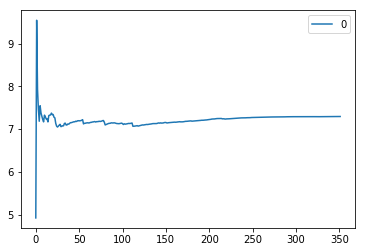

In [57]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [59]:
# Get the actual values for the test set.
actual = y_test
# Compute the mean squared error of our predictions.
mse = (((pred - actual) ** 2).sum()) / len(pred)
rmse = sqrt(mse)
rmse,mse

(7.294605348273455, 53.2112671870597)